In [1]:
import sys
import torch
import torchvision

print(f"Python Version: {sys.version}")
print(f"Torch Version: {torch.__version__}")
print(f"Torchvision Version: {torchvision.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"CUDA Version: {torch.version.cuda if torch.cuda.is_available() else 'N/A'}")
print(f"cuDNN Version: {torch.backends.cudnn.version() if torch.cuda.is_available() else 'N/A'}")


C:\Users\adith\.conda\envs\py36_env\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Python Version: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 14:00:49) [MSC v.1915 64 bit (AMD64)]
Torch Version: 1.8.0+cpu
Torchvision Version: 0.9.0+cpu
CUDA Available: False
CUDA Version: N/A
cuDNN Version: N/A


In [3]:
pip install matplotlib tqdm scikit-learn seaborn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
Note: you may need to restart the kernel to use updated packages.


Using device: cpu
Loading dataset from: C:\MY_FILES\S7\banana
Using separate train and validation directories
Train dataset size: 21585
Validation dataset size: 3076
Classes: ['bad', 'good', 'inter']
Creating MobileNetV2 model for banana classification...
Starting training...
Epoch 1/10
----------


train: 100%|██████████| 2699/2699 [22:22<00:00,  2.01it/s]


train Loss: 0.6230 Acc: 0.7888


val: 100%|██████████| 385/385 [02:41<00:00,  2.39it/s]


val Loss: 0.2058 Acc: 0.8963

Epoch 2/10
----------


train: 100%|██████████| 2699/2699 [19:52<00:00,  2.26it/s]


train Loss: 0.4546 Acc: 0.8241


val: 100%|██████████| 385/385 [02:07<00:00,  3.03it/s]


val Loss: 0.1775 Acc: 0.9044

Epoch 3/10
----------


train: 100%|██████████| 2699/2699 [16:58<00:00,  2.65it/s]


train Loss: 0.4033 Acc: 0.8330


val: 100%|██████████| 385/385 [02:05<00:00,  3.06it/s]


val Loss: 0.2116 Acc: 0.8973

Epoch 4/10
----------


train: 100%|██████████| 2699/2699 [17:25<00:00,  2.58it/s]


train Loss: 0.3550 Acc: 0.8372


val: 100%|██████████| 385/385 [02:06<00:00,  3.05it/s]


val Loss: 0.1806 Acc: 0.9021

Epoch 5/10
----------


train: 100%|██████████| 2699/2699 [19:08<00:00,  2.35it/s]


train Loss: 0.3191 Acc: 0.8427


val: 100%|██████████| 385/385 [02:15<00:00,  2.84it/s]


val Loss: 0.1961 Acc: 0.8963

Epoch 6/10
----------


train: 100%|██████████| 2699/2699 [21:06<00:00,  2.13it/s]


train Loss: 0.2623 Acc: 0.8579


val: 100%|██████████| 385/385 [02:14<00:00,  2.86it/s]


val Loss: 0.2281 Acc: 0.8862

Epoch 7/10
----------


train: 100%|██████████| 2699/2699 [43:24<00:00,  1.04it/s]    


train Loss: 0.2511 Acc: 0.8632


val: 100%|██████████| 385/385 [02:56<00:00,  2.18it/s]


val Loss: 0.1654 Acc: 0.9070

Epoch 8/10
----------


train: 100%|██████████| 2699/2699 [20:59<00:00,  2.14it/s]


train Loss: 0.2486 Acc: 0.8636


val: 100%|██████████| 385/385 [40:12<00:00,  6.27s/it]   


val Loss: 0.2028 Acc: 0.8943

Epoch 9/10
----------


train: 100%|██████████| 2699/2699 [41:29<00:00,  1.08it/s]    


train Loss: 0.2474 Acc: 0.8637


val: 100%|██████████| 385/385 [03:27<00:00,  1.86it/s]


val Loss: 0.2103 Acc: 0.8924

Epoch 10/10
----------


train: 100%|██████████| 2699/2699 [27:12<00:00,  1.65it/s]


train Loss: 0.2511 Acc: 0.8636


val: 100%|██████████| 385/385 [02:50<00:00,  2.26it/s]


val Loss: 0.3381 Acc: 0.8615

Training complete in 312m 56s
Best val Acc: 0.9070 at epoch 7
Model saved to banana_mobilenet_final.pth and banana_mobilenet_final.pt
Inference model saved for Jetson Nano in both .pth and .pt formats

Example code to load and use the model on Jetson Nano:

# Load model on Jetson Nano
import torch
from torchvision import transforms
from PIL import Image

# Define the same model architecture
model = BananaMobileNetV2Classifier(num_classes=3)
# You can load from either .pth or .pt file
model.load_state_dict(torch.load('banana_mobilenet_inference.pt'))  # or use .pth
model.eval()

# Define preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Function to predict banana quality
def predict_banana(image_path):
    image = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension

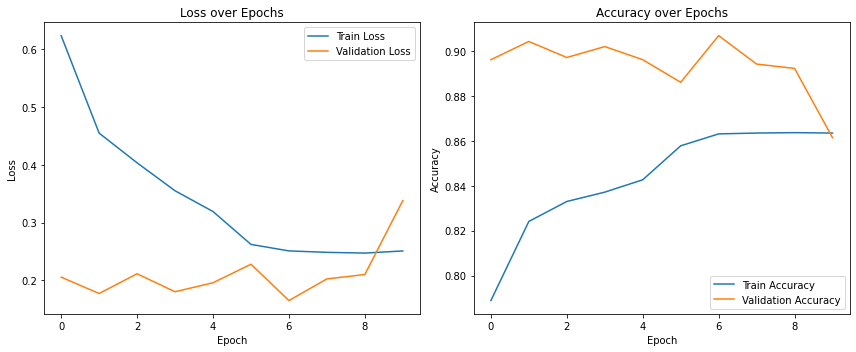

In [12]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, random_split, Subset
from torchvision import datasets, transforms, models
import time
import matplotlib.pyplot as plt
from tqdm import tqdm

# Using MobileNetV2 pretrained model for transfer learning
class BananaMobileNetV2Classifier(nn.Module):
    def __init__(self, num_classes=3):
        super(BananaMobileNetV2Classifier, self).__init__()
        # Load pretrained MobileNetV2 model
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        
        # Freeze early layers to prevent overfitting
        for param in list(self.mobilenet.parameters())[:-8]:
            param.requires_grad = False
            
        # Replace the classifier with our own for banana classification
        in_features = self.mobilenet.classifier[1].in_features
        self.mobilenet.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features, num_classes)
        )
    
    def forward(self, x):
        return self.mobilenet(x)

def train_model(model, dataloaders, criterion, optimizer, scheduler=None, num_epochs=10):
    since = time.time()
    
    # Track loss and accuracy
    train_loss_history = []
    val_loss_history = []
    train_acc_history = []
    val_acc_history = []
    
    best_acc = 0.0
    best_epoch = 0
    patience = 5  # Early stopping patience
    no_improve_counter = 0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch+1}/{num_epochs}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # Process batches
            for inputs, labels in tqdm(dataloaders[phase], desc=phase):
                # Move data to device (cpu in this case)
                device = next(model.parameters()).device
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                # Zero the parameter gradients
                optimizer.zero_grad()
                
                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                    _, preds = torch.max(outputs, 1)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data).item()

            # Calculate epoch statistics
            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects / len(dataloaders[phase].dataset)

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Store history
            if phase == 'train':
                train_loss_history.append(epoch_loss)
                train_acc_history.append(epoch_acc)
                # Step the learning rate scheduler if provided
                if scheduler is not None:
                    scheduler.step()
            else:
                val_loss_history.append(epoch_loss)
                val_acc_history.append(epoch_acc)
                
                # Save best model
                if epoch_acc > best_acc:
                    best_acc = epoch_acc
                    best_epoch = epoch
                    no_improve_counter = 0
                    torch.save(model.state_dict(), 'banana_mobilenet_best.pth')
                    # Also save as .pt file
                    torch.save(model.state_dict(), 'banana_mobilenet_best.pt')
                else:
                    no_improve_counter += 1
        
        # Early stopping check
        if no_improve_counter >= patience:
            print(f"Early stopping triggered after {epoch+1} epochs. No improvement for {patience} epochs.")
            break
        
        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f} at epoch {best_epoch+1}')
    
    # Plot results at the end
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(val_loss_history, label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(train_acc_history, label='Train Accuracy')
    plt.plot(val_acc_history, label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('banana_mobilenet_results.png')
    
    # Load best model weights
    model.load_state_dict(torch.load('banana_mobilenet_best.pth'))
    return model

def main():
    # Set device to CPU for Jupyter Notebook training
    device = torch.device("cpu")
    print(f"Using device: {device}")
    
    # Data path - update this to your actual path
    data_dir = r"C:\MY_FILES\S7\banana"
    print(f"Loading dataset from: {data_dir}")
    
    # Check if dataset has train/val subdirectories or needs to be split
    train_dir = os.path.join(data_dir, "train")
    val_dir = os.path.join(data_dir, "validation")
    
    # MobileNetV2 expected input size is 224x224
    input_size = 224
    
    # Data transforms - MobileNetV2 uses specific normalization values
    data_transforms = {
        'train': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.RandomHorizontalFlip(),
            transforms.RandomRotation(15),
            transforms.ColorJitter(brightness=0.1, contrast=0.1, saturation=0.1),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
        'val': transforms.Compose([
            transforms.Resize((input_size, input_size)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
        ]),
    }
    
    # Load datasets
    try:
        # Try loading with separate train/val directories
        if os.path.exists(train_dir) and os.path.exists(val_dir):
            image_datasets = {
                'train': datasets.ImageFolder(train_dir, data_transforms['train']),
                'val': datasets.ImageFolder(val_dir, data_transforms['val'])
            }
            print("Using separate train and validation directories")
        else:
            raise FileNotFoundError("Train/val subdirectories not found")
    except Exception as e:
        print(f"Using single dataset with train/val split: {e}")
        
        # If separate directories fail, use the same directory with a split
        full_dataset = datasets.ImageFolder(data_dir, data_transforms['train'])
        
        # Calculate split sizes
        total_size = len(full_dataset)
        train_size = int(0.8 * total_size)  # 80% for training
        val_size = total_size - train_size
        
        # Split the dataset with a fixed seed for reproducibility
        generator = torch.Generator().manual_seed(42)
        train_dataset, val_dataset = random_split(full_dataset, [train_size, val_size], generator=generator)
        
        # Apply correct transforms to each split
        train_dataset.dataset.transform = data_transforms['train']
        val_dataset.dataset.transform = data_transforms['val']
        
        image_datasets = {
            'train': train_dataset,
            'val': val_dataset
        }
    
    # Print dataset info
    print(f"Train dataset size: {len(image_datasets['train'])}")
    print(f"Validation dataset size: {len(image_datasets['val'])}")
    
    # Get class names with compatibility for different dataset structures
    try:
        if hasattr(image_datasets['train'], 'classes'):
            class_names = image_datasets['train'].classes
        elif hasattr(image_datasets['train'], 'dataset') and hasattr(image_datasets['train'].dataset, 'classes'):
            class_names = image_datasets['train'].dataset.classes
        else:
            # Try to get classes from the original dataset
            original_dataset = datasets.ImageFolder(data_dir)
            class_names = original_dataset.classes
    except Exception as e:
        print(f"Warning: Could not get class names automatically: {e}")
        class_names = ["good", "intermediate", "bad"]  # Default for banana classification
    
    print(f"Classes: {class_names}")
    
    # Use small batch size for CPU training
    batch_size = 8
    num_workers = 0  # No multi-processing for CPU
    
    dataloaders = {
        'train': DataLoader(image_datasets['train'], batch_size=batch_size, shuffle=True, num_workers=num_workers),
        'val': DataLoader(image_datasets['val'], batch_size=batch_size, shuffle=False, num_workers=num_workers)
    }
    
    # Number of classes
    num_classes = len(class_names)
    
    # Create MobileNetV2 model
    print("Creating MobileNetV2 model for banana classification...")
    model = BananaMobileNetV2Classifier(num_classes=num_classes)
    model = model.to(device)
    
    # Loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    
    # Use SGD with momentum and weight decay
    optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=1e-4)
    
    # Learning rate scheduler
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)
    
    # Train for a reasonable number of epochs for CPU
    num_epochs = 10
    
    print("Starting training...")
    model = train_model(
        model, 
        dataloaders, 
        criterion, 
        optimizer,
        scheduler=scheduler,
        num_epochs=num_epochs
    )
    
    # Save the final model with metadata in both formats
    final_save_dict = {
        'model_state_dict': model.state_dict(),
        'class_names': class_names,
        'input_size': input_size
    }
    
    # Save in .pth format
    torch.save(final_save_dict, 'banana_mobilenet_final.pth')
    
    # Save in .pt format
    torch.save(final_save_dict, 'banana_mobilenet_final.pt')
    
    print("Model saved to banana_mobilenet_final.pth and banana_mobilenet_final.pt")
    
    # Create inference model
    def prepare_inference_model():
        # Set model to evaluation mode
        model.eval()
        
        # Save a simpler format for Jetson Nano deployment in both formats
        torch.save(model.state_dict(), "banana_mobilenet_inference.pth")
        torch.save(model.state_dict(), "banana_mobilenet_inference.pt")
        print("Inference model saved for Jetson Nano in both .pth and .pt formats")
        
        # Create example function to load and use the model
        print("\nExample code to load and use the model on Jetson Nano:")
        print("""
# Load model on Jetson Nano
import torch
from torchvision import transforms
from PIL import Image

# Define the same model architecture
model = BananaMobileNetV2Classifier(num_classes=3)
# You can load from either .pth or .pt file
model.load_state_dict(torch.load('banana_mobilenet_inference.pt'))  # or use .pth
model.eval()

# Define preprocessing
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Function to predict banana quality
def predict_banana(image_path):
    image = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(image).unsqueeze(0)  # Add batch dimension
    
    with torch.no_grad():
        output = model(input_tensor)
        
    # Get prediction
    _, predicted_idx = torch.max(output, 1)
    class_names = ['good', 'intermediate', 'bad']  # Replace with your actual class names
    predicted_class = class_names[predicted_idx.item()]
    
    return predicted_class
        """)
    
    prepare_inference_model()
    
    print("Training and model preparation complete!")

if __name__ == "__main__":
    main()

Using device: cuda
Model loaded successfully from banana_mobilenet_final.pt
Class names: ['bad', 'good', 'inter']
Image: OIP.jpg
Prediction: good (Confidence: 100.00%)
Class probabilities:
  bad: 0.00%
  good: 100.00%
  inter: 0.00%


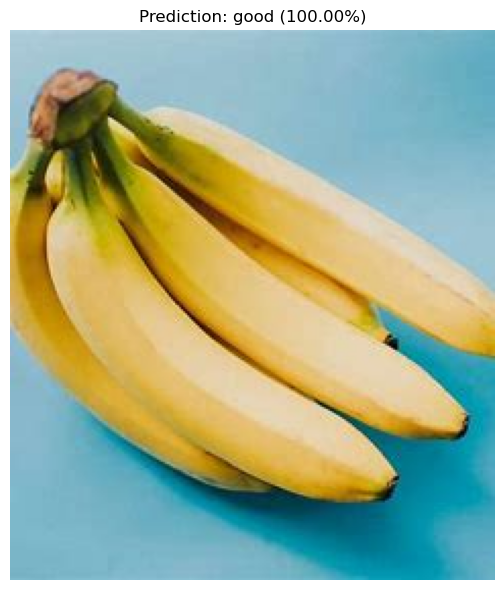

In [2]:
import os
import torch
import torch.nn as nn
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from pathlib import Path

# Define the same model architecture as in your training script
class BananaMobileNetV2Classifier(nn.Module):
    def __init__(self, num_classes=3):
        super(BananaMobileNetV2Classifier, self).__init__()
        # Load pretrained MobileNetV2 model
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        
        # Replace the classifier with our own for banana classification
        in_features = self.mobilenet.classifier[1].in_features
        self.mobilenet.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features, num_classes)
        )
    
    def forward(self, x):
        return self.mobilenet(x)

# Config - modify these variables as needed
MODEL_PATH = "banana_mobilenet_final.pt"  # Path to your model file
NUM_CLASSES = 3  # Number of classes in your model
CLASS_NAMES = ['good', 'inter', 'bad']  # Your class names

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

def load_model(model_path=MODEL_PATH, num_classes=NUM_CLASSES):
    """Load the trained model from disk"""
    # Create model with the same architecture
    model = BananaMobileNetV2Classifier(num_classes=num_classes)
    
    # Load model weights
    try:
        # First try loading as a full save with metadata
        checkpoint = torch.load(model_path, map_location=device)
        if isinstance(checkpoint, dict) and 'model_state_dict' in checkpoint:
            model.load_state_dict(checkpoint['model_state_dict'])
            class_names = checkpoint.get('class_names', CLASS_NAMES)
        else:
            # Otherwise, load as just the state dict
            model.load_state_dict(checkpoint)
            class_names = CLASS_NAMES  # Use default class names
        
        print(f"Model loaded successfully from {model_path}")
        print(f"Class names: {class_names}")
    except Exception as e:
        print(f"Error loading model: {e}")
        return None, None
    
    model = model.to(device)
    model.eval()  # Set to evaluation mode
    
    return model, class_names

def preprocess_image(image_path, input_size=224):
    """Preprocess a single image for prediction"""
    # MobileNetV2 normalization values
    preprocess = transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    image = Image.open(image_path).convert('RGB')
    input_tensor = preprocess(image)
    
    return input_tensor, image

def predict_single_image(model, image_path, class_names=CLASS_NAMES):
    """Predict class for a single image and display it"""
    if not os.path.exists(image_path):
        print(f"Image not found: {image_path}")
        return None, None, None
        
    input_tensor, original_image = preprocess_image(image_path)
    input_batch = input_tensor.unsqueeze(0).to(device)  # Add batch dimension
    
    with torch.no_grad():
        output = model(input_batch)
        
    # Get prediction
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    _, predicted_idx = torch.max(output, 1)
    
    predicted_class = class_names[predicted_idx.item()]
    confidence = probabilities[predicted_idx.item()].item() * 100
    
    # Display results
    print(f"Image: {os.path.basename(image_path)}")
    print(f"Prediction: {predicted_class} (Confidence: {confidence:.2f}%)")
    
    # Show probabilities for all classes
    print("Class probabilities:")
    for i, class_name in enumerate(class_names):
        print(f"  {class_name}: {probabilities[i].item()*100:.2f}%")
    
    # Display the image with prediction
    plt.figure(figsize=(8, 6))
    plt.imshow(original_image)
    plt.title(f"Prediction: {predicted_class} ({confidence:.2f}%)")
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return predicted_class, confidence, probabilities.cpu().numpy()

def batch_predict(model, image_dir, class_names=CLASS_NAMES, visualize=True, num_samples=5):
    """Run predictions on a batch of images in a directory"""
    if not os.path.isdir(image_dir):
        print(f"Directory not found: {image_dir}")
        return None
    
    results = []
    image_paths = [os.path.join(image_dir, f) for f in os.listdir(image_dir) 
                  if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    
    print(f"Found {len(image_paths)} images in {image_dir}")
    
    for image_path in tqdm(image_paths):
        try:
            input_tensor, _ = preprocess_image(image_path)
            input_batch = input_tensor.unsqueeze(0).to(device)
            
            with torch.no_grad():
                output = model(input_batch)
            
            probabilities = torch.nn.functional.softmax(output[0], dim=0)
            _, predicted_idx = torch.max(output, 1)
            
            predicted_class = class_names[predicted_idx.item()]
            confidence = probabilities[predicted_idx.item()].item() * 100
            
            results.append({
                'image': os.path.basename(image_path),
                'path': image_path,
                'prediction': predicted_class,
                'confidence': confidence,
                'probabilities': probabilities.cpu().numpy()
            })
        except Exception as e:
            print(f"Error processing {image_path}: {e}")
    
    # Summarize results
    class_counts = {class_name: 0 for class_name in class_names}
    for result in results:
        class_counts[result['prediction']] += 1
    
    print("\nPrediction Summary:")
    for class_name, count in class_counts.items():
        percentage = count/len(results)*100 if results else 0
        print(f"  {class_name}: {count} images ({percentage:.1f}%)")
    
    # Visualize a subset of results
    if visualize and results:
        visualize_batch_results(results, class_names, num_samples)
    
    return results

def visualize_batch_results(results, class_names=CLASS_NAMES, num_samples=5):
    """Visualize a subset of prediction results"""
    # Select a random subset of results to visualize
    if len(results) > num_samples:
        sample_indices = np.random.choice(len(results), num_samples, replace=False)
        sample_results = [results[i] for i in sample_indices]
    else:
        sample_results = results
    
    # Create a figure with subplots
    num_cols = min(5, len(sample_results))
    num_rows = (len(sample_results) + num_cols - 1) // num_cols
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*3, num_rows*3))
    
    # Handle case where there's only one row or one column
    if num_rows == 1 and num_cols == 1:
        axes = np.array([axes])
    elif num_rows == 1:
        axes = axes.reshape(1, -1)
    elif num_cols == 1:
        axes = axes.reshape(-1, 1)
    
    # Plot each sample
    for i, result in enumerate(sample_results):
        row, col = i // num_cols, i % num_cols
        image = Image.open(result['path']).convert('RGB')
        
        axes[row, col].imshow(image)
        axes[row, col].set_title(f"{result['prediction']}\n{result['confidence']:.1f}%", fontsize=10)
        axes[row, col].axis('off')
    
    # Hide unused subplots
    for i in range(len(sample_results), num_rows * num_cols):
        row, col = i // num_cols, i % num_cols
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

# Load the model (run this cell first)
model, class_names = load_model()

# Example usage for single image prediction
# Replace with your image pat
image_path = r"C:\Users\adith\Downloads\OIP.jpg" # MODIFY THIS LINE
if model is not None:
    result = predict_single_image(model, image_path, class_names)

# Example usage for batch prediction 
# Replace with your directory of test images
# batch_dir = "path/to/test_images"  # MODIFY THIS LINE
# if model is not None:
#     batch_results = batch_predict(model, batch_dir, class_names)

In [3]:
import cv2
import torch
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
import numpy as np
import time
from IPython.display import clear_output, display
import matplotlib.pyplot as plt
import ipywidgets as widgets

# Using MobileNetV2 pretrained model for transfer learning - same class as in your model
class BananaMobileNetV2Classifier(nn.Module):
    def __init__(self, num_classes=3):
        super(BananaMobileNetV2Classifier, self).__init__()
        # Load pretrained MobileNetV2 model
        self.mobilenet = models.mobilenet_v2(pretrained=True)
        
        # Replace the classifier with our own for banana classification
        in_features = self.mobilenet.classifier[1].in_features
        self.mobilenet.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features, num_classes)
        )
    
    def forward(self, x):
        return self.mobilenet(x)

# Function to load the model
def load_model(model_path, num_classes=3):
    # Create model instance
    model = BananaMobileNetV2Classifier(num_classes=num_classes)
    
    # Try loading the full model first
    try:
        saved_data = torch.load(model_path)
        if isinstance(saved_data, dict) and 'model_state_dict' in saved_data:
            model.load_state_dict(saved_data['model_state_dict'])
            # Get class names if available
            class_names = saved_data.get('class_names', ['good', 'intermediate', 'bad'])
        else:
            # If it's just the state dict
            model.load_state_dict(saved_data)
            class_names = ['good', 'intermediate', 'bad']
    except Exception as e:
        print(f"Error loading model: {e}")
        print("Using default class names")
        class_names = ['good', 'intermediate', 'bad']
    
    model.eval()
    return model, class_names

# Preprocess image for the model
def preprocess_image(image):
    # Define preprocessing transforms - same as in training
    preprocess = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Convert OpenCV image (BGR) to PIL image (RGB)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(image_rgb)
    
    # Apply preprocessing
    input_tensor = preprocess(pil_image)
    input_batch = input_tensor.unsqueeze(0)  # Add batch dimension
    
    return input_batch

# Get prediction from model
def get_prediction(model, input_tensor, class_names):
    with torch.no_grad():
        output = model(input_tensor)
        
    # Get prediction class
    _, predicted_idx = torch.max(output, 1)
    predicted_class = class_names[predicted_idx.item()]
    
    # Get probabilities
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    
    return predicted_class, probabilities.numpy()

# Display the webcam frame with prediction
def display_frame(frame, prediction, probabilities, class_names):
    # Convert OpenCV image (BGR) to RGB for matplotlib
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(10, 6))
    
    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(rgb_frame)
    plt.title(f"Prediction: {prediction}")
    plt.axis('off')
    
    # Display probabilities as bar chart
    plt.subplot(1, 2, 2)
    colors = ['green', 'orange', 'red']
    plt.barh(class_names, probabilities, color=colors[:len(class_names)])
    plt.xlim(0, 1.0)
    plt.xlabel('Probability')
    plt.title('Classification Probabilities')
    
    plt.tight_layout()
    plt.show()

# Real-time webcam classification
def run_webcam_classification(model_path="banana_mobilenet_final.pt"):
    print("Loading model...")
    model, class_names = load_model(model_path)
    print(f"Model loaded. Class names: {class_names}")
    
    print("Opening webcam...")
    cap = cv2.VideoCapture(0)  # 0 is usually the default webcam
    
    if not cap.isOpened():
        print("Error: Could not open webcam")
        return
    
    print("Webcam opened successfully!")
    print("Press 'q' to quit (while the image window is active)")
    
    # Create stop button widget
    stop_button = widgets.Button(description="Stop Webcam")
    display(stop_button)
    
    stop_flag = False
    
    def on_stop_button_clicked(b):
        nonlocal stop_flag
        stop_flag = True
        print("Stopping...")
    
    stop_button.on_click(on_stop_button_clicked)
    
    while not stop_flag:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        if not ret:
            print("Failed to grab frame")
            break
            
        # Mirror the frame (selfie view)
        frame = cv2.flip(frame, 1)
        
        # Preprocess the frame
        input_tensor = preprocess_image(frame)
        
        # Get prediction
        prediction, probabilities = get_prediction(model, input_tensor, class_names)
        
        # Display the frame with prediction
        clear_output(wait=True)
        display(stop_button)
        display_frame(frame, prediction, probabilities, class_names)
        
        # Small pause to not overwhelm the CPU
        time.sleep(0.1)
        
        # Check for 'q' key press to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    
    # Release the webcam
    cap.release()
    cv2.destroyAllWindows()
    print("Webcam released")

# Run the function (just call this in your notebook)
# run_webcam_classification("path/to/your/model.pt")

# Example usage:
# Load your trained model
# run_webcam_classification("banana_mobilenet_final.pt")  # Use your actual model path
